# 03 Visualisering og analyse
Vi importerer et regneark og ser hva vi finner.

* Datasett: barentshavet-sorost-fremskriving.xlsx
* Kilde: Teknisk Ukeblad
* URL: https://www.tu.no/artikler/oljemyndighetenes-excel-feil-ble-ikke-oppdaget-stortinget-apnet-barentshavet-sorost-med-regnefeil-pa-over-100-milliarder/405367
* Hentet: 28.10.2017

## Importerer pakker vi trenger.

Vi bruker biblioteket matplotlib til å visualisere. Merk den første linjen, den gjør at grafikkene vises inne i Notebook.

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Importer datasett
Vi har hentet ned datasett fra Oljedirektoratet (via TU). Vi synes tallene virker rare og vil sjekke de.

In [9]:
df = pd.read_excel('data/barentshavet-sorost-fremskriving.xlsx')

Vi begynner med å kontrollere dataframen vår. Ser tallene rett ut? Har vi fått med oss alle dataene? Vi vet at det skal være 24 rader med data (2027 - 2050)

In [10]:
df.head(n=3)

,årstall,olje,gass
0,2027,0.0,0.0
1,2028,0.0,0.0
2,2029,2.3,2.0


In [11]:
df.describe()

,årstall,olje,gass
count,24.000000,24.000000,24.000000
mean,2038.500000,1.249583,2.450000
std,7.071068,3.066884,5.997318
min,2027.000000,0.000000,0.000000
25%,2032.750000,0.000000,0.075000
50%,2038.500000,0.085000,0.900000
75%,2044.250000,1.547500,2.925000
max,2050.000000,15.000000,30.000000


## Analyse
Standardavviket er mye større enn en gjennomsnittet. Det får oss til å tenke.
* Gjennomsnitt (mean): Sier noe om hvor senterpunkt for dataene er.
* Standardavvik (std): Sier noe om spredningen på dataene.
Altså er det noe i dataene som drar standardavviket opp. 

Et annet mål på middelverdi er median som sier hva det midterste tallet i datasettet vårt er. La oss undersøke gass.

In [36]:
df.gass.median()

0.9

Dette forteller oss at det er 12 tall som er under 0.9 og 12 tall som er over. Altså må det være et stort tall her.

## Visualisere
Det er ofte enklere å finne rare ting i datasettet med å se de. Så la oss se om det er noen punkter som utspeiler seg.
Vi bruker plot funksjonen på dataframen vår, og forteller tittel, hva kolonne som er x og hvikle kolonner er y. Siden vi har to sender vi de inn som et array.

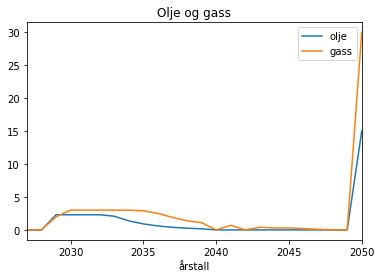

In [37]:
df.plot(title="Olje og gass", x="årstall", y=["olje", "gass"])

Vi aner i ugler i mosen av den voldsomme økningen i 2050. Hva kan ha skjedd her? Magen sier at her har det vært en tastefeil. La oss se hvordan tallene for 2050 ser ut.

In [27]:
df.tail(n=5)

,årstall,olje,gass
19,2046,0.0,0.2
20,2047,0.0,0.1
21,2048,0.0,0.0
22,2049,0.0,0.0
23,2050,15.0,30.0


Skulle det vært et komma i 2050-tallene? Men det virker rart med et plutselig hopp. Kan det være sum? La oss finne ut hva summen er for tallene.

In [38]:
df.sum()

årstall    48924.00
olje          29.99
gass          58.80
dtype: float64

Summen virker å være rund det doble av 2050-tallene. La oss ta alle tallene for år som er lavere enn 2050 og summere de.

In [39]:
df_pre2050 = df[df['årstall'] < 2050]

In [40]:
df_pre2050.sum()

årstall    46874.00
olje          14.99
gass          28.80
dtype: float64

Quod Erat Demonstrandum-ish